In [1]:
### Update first your entire Anaconda distribution
# conda update conda
# conda update --all

In [2]:
import sys

In [3]:
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [4]:
# Imports the libraries we will be using
from pandas_datareader import data
import pandas as pd
import numpy as np

If you have not yet installed any of these libraries, remember to open a new/clean terminal on a mac or the "Anaconda Prompt" on Windows and run:

__- conda install 'name_of_package'__

__conda install__ is the suggested method as you can manage your installed packages with the Anaconda Navigator in the Anaconda Distribution, however, keep in mind that not all existing packages can be installed without pre installing their repspective channel. 

Some packages, are just not available for the Anaconda distribution, in which case, we will use:

__- pip install 'name of package'__

If you need admin rights, then you should write:

__- sudo conda install 'name_of_package'__
you will be asked for your password and the installation will begin.

Example:

__sudo conda install pandas-datareader__


In [5]:
# Gets the data we need for our example from yahoo finance

start_date = "2016-1-1"
end_date = "2020-1-1"
source = "yahoo"
symbol = "AAPL"

apple_data = data.DataReader(symbol, data_source = source, start = start_date, end = end_date)

In [6]:
apple_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.220573
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.613623
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.151518
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.174414
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.291668


In [7]:
apple_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.938210
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.325806
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.298721
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.721893
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.245941


We will use the __adjusted price__, since it already takes into account splits and dividends.
Then, we need a __signal__, which is the event that triggers the sending of an order. The inputs used to create a signal can be very diverse. They can be market signals, news events, etc. Any combination of data can result in a signal, it is the criteria of the trader that will define it, based on intuition, experience, statistical methods, etc.
In our example, we will use basic human intuition and establish a __buy low and sell high strategy__. We need to calculate therefore, the difference in the adjusted close price between two consecutive days. If the difference between two days is negative, then we can conclude that the price on the prior day was higher than the price of the asset the next day, therefore, we can send a buy order.

In [8]:
apple_signal = pd.DataFrame(index = apple_data.index)

In [9]:
apple_signal

""
Date
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
...
2019-12-24
2019-12-26
2019-12-27


In [10]:
apple_signal["price"] = apple_data["Adj Close"]

In [11]:
apple_signal.head()

,price
Date,
2016-01-04,24.220573
2016-01-05,23.613623
2016-01-06,23.151518
2016-01-07,22.174414
2016-01-08,22.291668


In [12]:
apple_signal.tail()

,price
Date,
2019-12-24,69.938210
2019-12-26,71.325806
2019-12-27,71.298721
2019-12-30,71.721893
2019-12-31,72.245941


In [13]:
apple_signal["daily_difference"] = apple_signal["price"].diff()

In [14]:
apple_signal.head()

,price,daily_difference
Date,,
2016-01-04,24.220573,NaN
2016-01-05,23.613623,-0.606951
2016-01-06,23.151518,-0.462105
2016-01-07,22.174414,-0.977104
2016-01-08,22.291668,0.117254


In [15]:
apple_signal.tail()

,price,daily_difference
Date,,
2019-12-24,69.938210,0.066422
2019-12-26,71.325806,1.387596
2019-12-27,71.298721,-0.027084
2019-12-30,71.721893,0.423172
2019-12-31,72.245941,0.524048


The signal will be included in the column daily_difference. If the value is positive, we will assign the number 0, otherwise, we will assign the number 1.

In [16]:
apple_signal["signal"] = 0.0
apple_signal["signal"] = np.where(apple_signal["daily_difference"] > 0, 0.0, 1.0)

In [17]:
apple_signal

,price,daily_difference,signal
Date,,,
2016-01-04,24.220573,NaN,1.0
2016-01-05,23.613623,-0.606951,1.0
2016-01-06,23.151518,-0.462105,1.0
2016-01-07,22.174414,-0.977104,1.0
2016-01-08,22.291668,0.117254,0.0
...,...,...,...
2019-12-24,69.938210,0.066422,0.0
2019-12-26,71.325806,1.387596,0.0
2019-12-27,71.298721,-0.027084,1.0


The column "signal" will determine the type of action/order to perform, because we are implementing a buy low and sell high strategy; we will buy when the signal is 1, and we will sell when the signal is 0.

Since we won't be buying every single time the price of the asset goes down and selling every single time the price goes up, we will limit the number of orders to the number of market positions. Hence, whenever your buy order is executed, you are said to have a position of one share of Apple. Once you sell the share, you are flat (not have any market positions).

In [18]:
apple_signal["positions"] = apple_signal["signal"].diff()

In [19]:
apple_signal.head(15)

,price,daily_difference,signal,positions
Date,,,,
2016-01-04,24.220573,NaN,1.0,NaN
2016-01-05,23.613623,-0.606951,1.0,0.0
2016-01-06,23.151518,-0.462105,1.0,0.0
2016-01-07,22.174414,-0.977104,1.0,0.0
2016-01-08,22.291668,0.117254,0.0,-1.0
2016-01-11,22.652618,0.360950,0.0,0.0
2016-01-12,22.981388,0.328770,0.0,0.0
2016-01-13,22.390524,-0.590864,1.0,1.0
2016-01-14,22.880230,0.489706,0.0,-1.0


In [20]:
apple_signal.loc["2016-01-07"]["positions"] = 1

In [21]:
apple_signal.loc["2016-01-07": ]

,price,daily_difference,signal,positions
Date,,,,
2016-01-07,22.174414,-0.977104,1.0,1.0
2016-01-08,22.291668,0.117254,0.0,-1.0
2016-01-11,22.652618,0.360950,0.0,0.0
2016-01-12,22.981388,0.328770,0.0,0.0
2016-01-13,22.390524,-0.590864,1.0,1.0
...,...,...,...,...
2019-12-24,69.938210,0.066422,0.0,0.0
2019-12-26,71.325806,1.387596,0.0,0.0
2019-12-27,71.298721,-0.027084,1.0,1.0


In [22]:
apple_signal = apple_signal.loc["2016-01-07": ]

In [23]:
apple_signal.head(20)

,price,daily_difference,signal,positions
Date,,,,
2016-01-07,22.174414,-0.977104,1.0,1.0
2016-01-08,22.291668,0.117254,0.0,-1.0
2016-01-11,22.652618,0.360950,0.0,0.0
2016-01-12,22.981388,0.328770,0.0,0.0
2016-01-13,22.390524,-0.590864,1.0,1.0
2016-01-14,22.880230,0.489706,0.0,-1.0
2016-01-15,22.330748,-0.549482,1.0,1.0
2016-01-19,22.222700,-0.108047,1.0,0.0
2016-01-20,22.252583,0.029882,0.0,-1.0


The above means that we buy an initial share on date-D, in this case, on the 7th of January 2016, and because there is an increase in the price the next day, we sell it for a profit. Notice that we will be flat on the 11th and 12th, beasue the price of the asset has increased, and we do not want to pay an expensive price for the asset. This changes on the 13th, where the price decreases from one day to the other. Hence, we buy another share and sell it on the next day for a profit, since its price increased, and so on...

## Data / Signal Visualization

In [24]:
import matplotlib.pyplot as plt

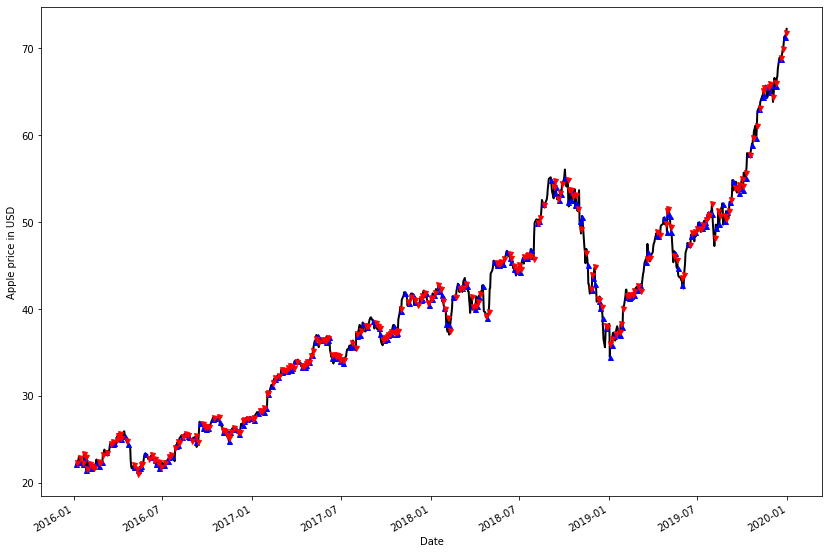

In [25]:
# Creates the canvas where we will be visualizing our data
fig = plt.figure(figsize = (14, 10)) 
# Defines a figure inside our canvas where we inlude our signal visualization
ax_1 = fig.add_subplot(111, ylabel = "Apple price in USD") 
# Plots the price within our chosen day range
apple_signal["price"].plot(ax = ax_1, color = "k", lw = 2.0) 
# Assigns an upwards arrow to the BUY signal
ax_1.plot(apple_signal.loc[apple_signal["positions"] == 1.0].index,
         apple_signal.loc[apple_signal["positions"] == 1.0]["price"],
         "^", markersize = 5, color = "b")
# Assigns a downwards arrow to the SELL signal
ax_1.plot(apple_signal.loc[apple_signal["positions"] == -1.0].index, 
         apple_signal.loc[apple_signal["positions"] == -1.0]["price"],
         "v", markersize = 5, color = "r")
# Shows our plot
plt.show()

Up to this point, we have:

- Applied the trading idea

- Defined and implemented the trading signal

- Limited the number of market positions to one share of Apple

Next: Backtest the trading strategy

Backtesting is crucial to show the effectiveness of the trading strategy by using past data. Nevertheless, keep in mind that backtesting relies heavily on the assumption that the past is an accurate predictor of the future. In normal times, this can very well be the case, but we cannot say the same of periods of high volatility, in which case that assumption would be broken.

The type of information returned by a backtest would be:

- Pure/Gross Profit and Loss Evaluation, meaning that we leave out any transaction fees in our analysis. When we take them into account, we would be talking about Net Profit and Loss evaluation.

- Exposure. The amount of capital invested.

- Number of Trades placed.

- Annualized Return.

- An evaluation of the average rate of return of the strategy earned in excess to the average returns of our chosen benchmark (the market) per unit of volatility (Sharpe Ratio).

In [26]:
initial_inv = float(1000.0)

In [27]:
# Creates a DataFrame that includes the positions and the portfolio
positions = pd.DataFrame(index = apple_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index = apple_signal.index).fillna(0.0)

In [28]:
# Stores the positions relative to the signals in Apple in the DataFrame
positions["AAPL"] = apple_signal["signal"]
positions

,AAPL
Date,
2016-01-07,1.0
2016-01-08,0.0
2016-01-11,0.0
2016-01-12,0.0
2016-01-13,1.0
...,...
2019-12-24,0.0
2019-12-26,0.0
2019-12-27,1.0


In [29]:
# Stores the value of the Apple positions for the portfolio in the DataFrame
portfolio["positions"] = (positions.multiply(apple_signal["price"], axis = 0))
portfolio.head(20)

,positions
Date,
2016-01-07,22.174414
2016-01-08,0.000000
2016-01-11,0.000000
2016-01-12,0.000000
2016-01-13,22.390524
2016-01-14,0.000000
2016-01-15,22.330748
2016-01-19,22.222700
2016-01-20,0.000000


In [30]:
# Estimates non-invested cash
portfolio["cash"] = initial_inv - (positions.diff().multiply(apple_signal["price"], axis = 0)).cumsum() 

In [31]:
# Estimates total investment (positions + cash)
portfolio["total"] = portfolio["positions"] + portfolio["cash"]
portfolio.head()

,positions,cash,total
Date,,,
2016-01-07,22.174414,NaN,NaN
2016-01-08,0.000000,1022.291668,1022.291668
2016-01-11,0.000000,1022.291668,1022.291668
2016-01-12,0.000000,1022.291668,1022.291668
2016-01-13,22.390524,999.901144,1022.291668


In [32]:
portfolio.tail()

,positions,cash,total
Date,,,
2019-12-24,0.000000,1035.858381,1035.858381
2019-12-26,0.000000,1035.858381,1035.858381
2019-12-27,71.298721,964.559660,1035.858381
2019-12-30,0.000000,1036.281553,1036.281553
2019-12-31,0.000000,1036.281553,1036.281553


`End of File`